In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
from pathlib import Path

actions = []

video_file_path = '/Users/sunukkim/PycharmProjects/sign_language_AIVision/videos'
for file in Path(video_file_path).iterdir():
    print(file.stem)
    actions.append(file.stem)
print(actions)

일본어
솔직하다
오빠
할아버지
어른
물놀이
고리타분
마라톤
테니스
영어
조용하다
수영
특기
형
낚시
똑똑하다
수다스럽다
노인
청소년
할머니
청년
계획적
귀엽다
야구
친부
독특
친모
긍정적
누나
한국인
엉뚱
없다
권투
여동생
노래
한국어
['일본어', '솔직하다', '오빠', '할아버지', '어른', '물놀이', '고리타분', '마라톤', '테니스', '영어', '조용하다', '수영', '특기', '형', '낚시', '똑똑하다', '수다스럽다', '노인', '청소년', '할머니', '청년', '계획적', '귀엽다', '야구', '친부', '독특', '친모', '긍정적', '누나', '한국인', '엉뚱', '없다', '권투', '여동생', '노래', '한국어']


In [3]:
data = np.concatenate([
    np.load('dataset/seq_일본어_1683790288.npy'),
    np.load('dataset/seq_솔직하다_1683790288.npy'),
    np.load('dataset/seq_오빠_1683790288.npy'),
    np.load('dataset/seq_할아버지_1683790288.npy'),
    np.load('dataset/seq_어른_1683790288.npy'),
    np.load('dataset/seq_물놀이_1683790288.npy'),
    np.load('dataset/seq_고리타분_1683790288.npy'),
    np.load('dataset/seq_마라톤_1683790288.npy'),
    np.load('dataset/seq_테니스_1683790288.npy'),
    np.load('dataset/seq_영어_1683790288.npy'),
    np.load('dataset/seq_조용하다_1683790288.npy'),
    np.load('dataset/seq_수영_1683790288.npy'),
    np.load('dataset/seq_특기_1683790288.npy'),
    np.load('dataset/seq_형_1683790288.npy'),
    np.load('dataset/seq_낚시_1683790288.npy'),
    np.load('dataset/seq_똑똑하다_1683790288.npy'),
    np.load('dataset/seq_수다스럽다_1683790288.npy'),
    np.load('dataset/seq_노인_1683790288.npy'),
    np.load('dataset/seq_청소년_1683790288.npy'),
    np.load('dataset/seq_할머니_1683790288.npy'),
    np.load('dataset/seq_청년_1683790288.npy'),
    np.load('dataset/seq_계획적_1683790288.npy'),
    np.load('dataset/seq_귀엽다_1683790288.npy'),
    np.load('dataset/seq_야구_1683790288.npy'),
    np.load('dataset/seq_친부_1683790288.npy'),
    np.load('dataset/seq_독특_1683790288.npy'),
    np.load('dataset/seq_친모_1683790288.npy'),
    np.load('dataset/seq_긍정적_1683790288.npy'),
    np.load('dataset/seq_누나_1683790288.npy'),
    np.load('dataset/seq_한국인_1683790288.npy'),
    np.load('dataset/seq_엉뚱_1683790288.npy'),
    np.load('dataset/seq_없다_1683790288.npy'),
    np.load('dataset/seq_권투_1683790288.npy'),
    np.load('dataset/seq_여동생_1683790288.npy'),
    np.load('dataset/seq_노래_1683790288.npy'),
    np.load('dataset/seq_한국어_1683790288.npy')
], axis=0)

data.shape

(61575, 30, 100)

In [4]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(61575, 30, 99)
(61575,)


In [5]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(61575, 36)

In [6]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(55417, 30, 99) (55417, 36)
(6158, 30, 99) (6158, 36)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=x_train.shape[1:]),
    MaxPooling1D(3),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

2023-05-11 17:08:23.199719: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 17:08:23.200689: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 64)            19072     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 9, 64)             33024     
_________________________________________________________________
dropout (Dropout)            (None, 9, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 36)                1

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models/fourth_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Train on 55417 samples, validate on 6158 samples
Epoch 1/50
55360/55417 [============================>.] - ETA: 0s - loss: 3.5296 - acc: 0.0436
Epoch 00001: val_acc improved from -inf to 0.09727, saving model to models/fourth_model.h5
55417/55417 [==============================] - 89s 2ms/sample - loss: 3.5294 - acc: 0.0437 - val_loss: 3.1891 - val_acc: 0.0973
Epoch 2/50
55392/55417 [============================>.] - ETA: 0s - loss: 2.4229 - acc: 0.2509
Epoch 00002: val_acc improved from 0.09727 to 0.40403, saving model to models/fourth_model.h5
55417/55417 [==============================] - 92s 2ms/sample - loss: 2.4227 - acc: 0.2510 - val_loss: 1.8036 - val_acc: 0.4040
Epoch 3/50
55392/55417 [============================>.] - ETA: 0s - loss: 1.5883 - acc: 0.4676
Epoch 00003: val_acc improved from 0.40403 to 0.62390, saving model to models/fourth_model.h5
55417/55417 [==============================] - 190s 3ms/sample - loss: 1.5881 - acc: 0.4677 - val_loss: 1.0696 - val_acc: 0.6239
Ep

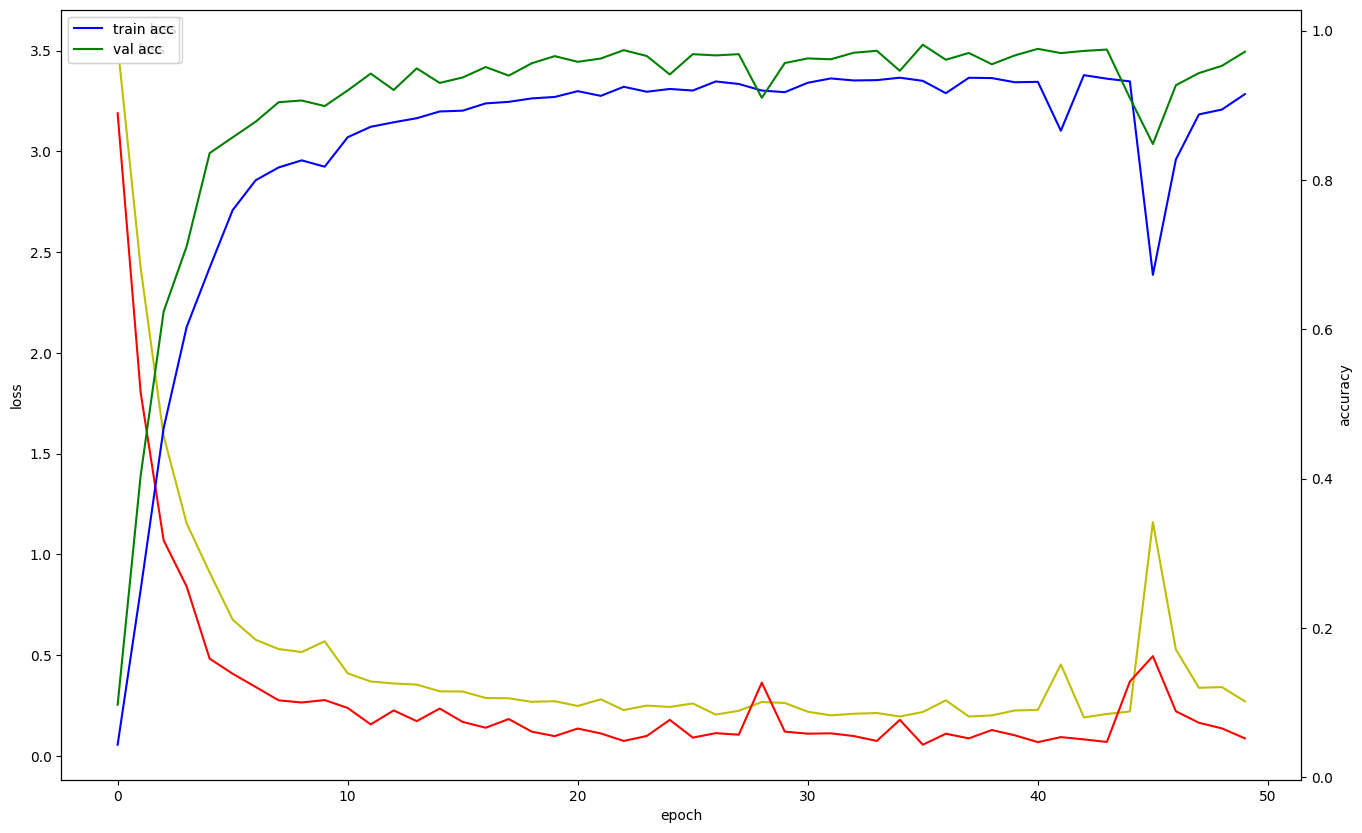

In [9]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [10]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/fourth_model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[5996,    3],
        [   4,  155]],

       [[5990,    0],
        [   3,  165]],

       [[5985,    3],
        [   0,  170]],

       [[5981,    4],
        [   0,  173]],

       [[5991,    6],
        [  30,  131]],

       [[5978,    0],
        [   1,  179]],

       [[5990,    0],
        [   2,  166]],

       [[5986,    1],
        [   0,  171]],

       [[5990,    0],
        [   0,  168]],

       [[5990,    0],
        [   0,  168]],

       [[5982,    1],
        [   1,  174]],

       [[5995,    0],
        [   0,  163]],

       [[5992,    0],
        [   1,  165]],

       [[5978,    0],
        [   0,  180]],

       [[5999,    0],
        [   0,  159]],

       [[6003,    2],
        [   0,  153]],

       [[5971,    0],
        [   1,  186]],

       [[5978,   29],
        [   5,  146]],

       [[6002,    0],
        [   2,  154]],

       [[5995,    0],
        [   1,  162]],

       [[5963,   20],
        [  15,  160]],

       [[5979,    2],
        [   